In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler

PREPROCESSING

In [4]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\data set\loan_data_set.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
df.shape

(614, 13)

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

FEATURE ENGINEERING

In [11]:
df=df.drop(['Loan_ID'],axis=1)

In [12]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [13]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [14]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

PLOTS

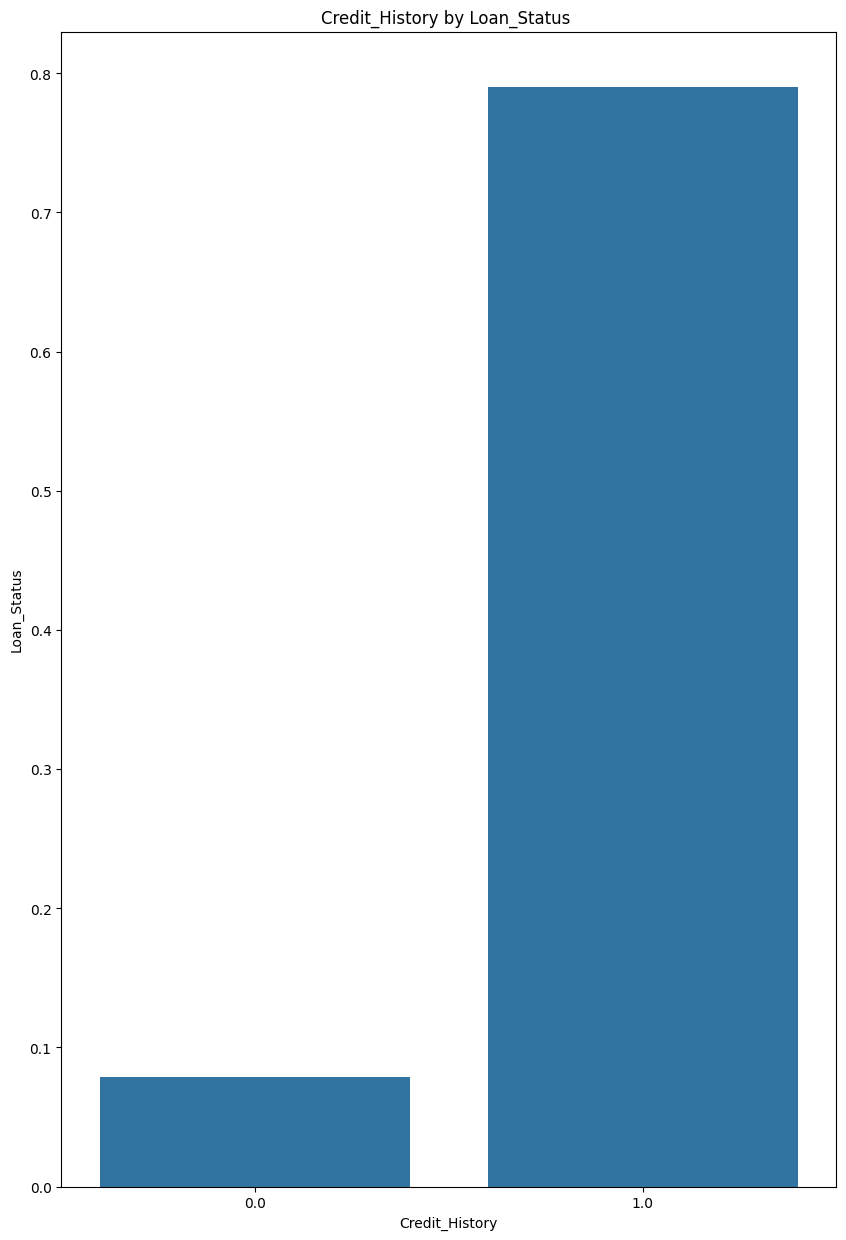

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,15))
sns.barplot(x='Credit_History', y='Loan_Status',data=df,errorbar=None)
plt.title("Credit_History by Loan_Status ")
plt.xlabel("Credit_History")
plt.ylabel("Loan_Status")
plt.show()
#the person who paid a loan is high

In [19]:
counts=df['Loan_Status'].value_counts()

([<matplotlib.patches.Wedge at 0x16e780e0b90>,
 [Text(-0.9981897340095354, -0.6660459855880623, 'yes'),
  Text(0.99818967578194, 0.6660460728525812, 'no')],
 [Text(-0.5822773448388956, -0.3885268249263696, '68.7%'),
  Text(0.5822773108727982, 0.3885268758306723, '31.3%')])

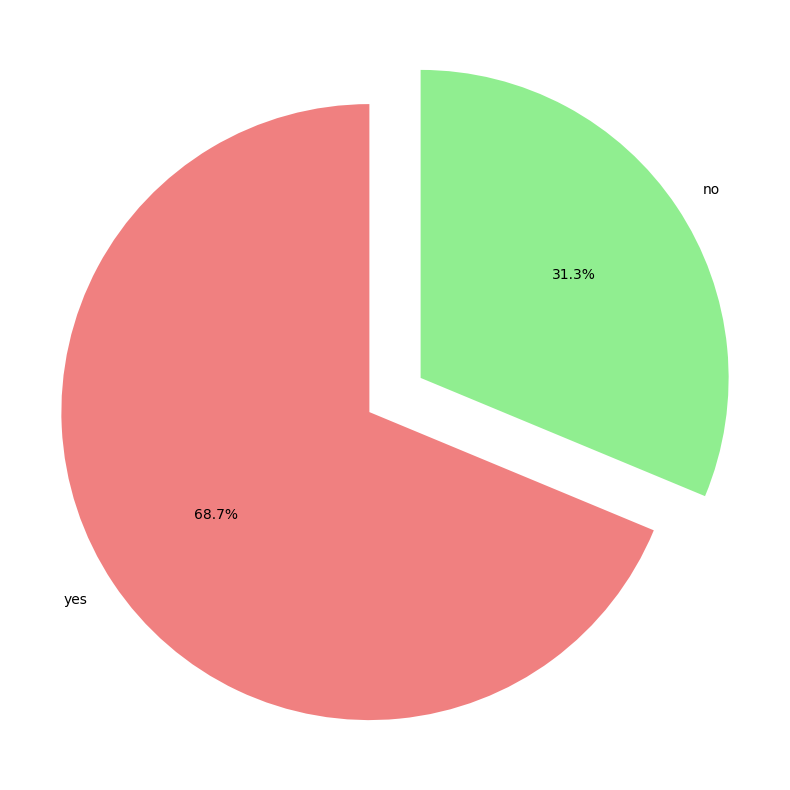

In [21]:
plt.figure(figsize=(10,10))
plt.pie(counts,labels=['yes','no'],autopct='%1.1f%%',colors=['lightcoral','lightgreen'],startangle=90,explode=(0.1,0.1))
#did not survied was high

In [22]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE
x=df.drop(columns="Loan_Status",axis=1)
y=df["Loan_Status"]
smote=SMOTE(sampling_strategy="minority")
x_sm,y_sm=smote.fit_resample(x,y)
print(x_sm.shape)
print(y_sm.shape)

(844, 11)
(844,)


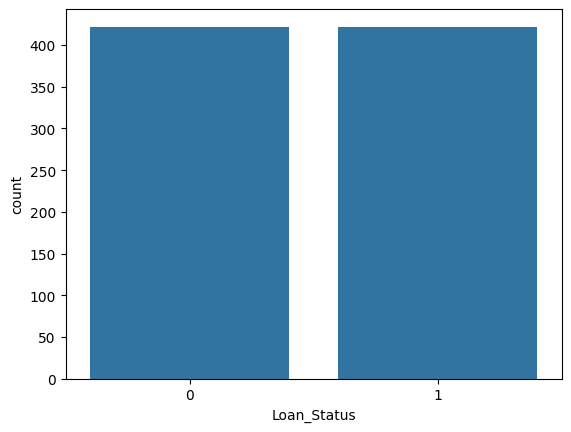

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=y_sm)
plt.show()

CHOOSING X AND Y

In [25]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x=mn.fit_transform(x)

TRAIN TEST SPLIT

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

MODELS WITHOUT PARAMETER

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression() 
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7837837837837838
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]


In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7945945945945946
              precision    recall  f1-score   support

           0       0.94      0.45      0.60        65
           1       0.77      0.98      0.86       120

    accuracy                           0.79       185
   macro avg       0.85      0.71      0.73       185
weighted avg       0.83      0.79      0.77       185

[[ 29  36]
 [  2 118]]


In [29]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6324324324324324
              precision    recall  f1-score   support

           0       0.48      0.48      0.48        65
           1       0.72      0.72      0.72       120

    accuracy                           0.63       185
   macro avg       0.60      0.60      0.60       185
weighted avg       0.63      0.63      0.63       185

[[31 34]
 [34 86]]


In [30]:
model=DecisionTreeClassifier()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       120

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185

[[ 65   0]
 [  0 120]]


In [31]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7783783783783784
              precision    recall  f1-score   support

           0       0.85      0.45      0.59        65
           1       0.76      0.96      0.85       120

    accuracy                           0.78       185
   macro avg       0.81      0.70      0.72       185
weighted avg       0.79      0.78      0.76       185

[[ 29  36]
 [  5 115]]


In [32]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       120

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185

[[ 65   0]
 [  0 120]]


In [33]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7837837837837838
[[ 27  38]
 [  2 118]]
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



In [34]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7891891891891892
[[ 28  37]
 [  2 118]]
              precision    recall  f1-score   support

           0       0.93      0.43      0.59        65
           1       0.76      0.98      0.86       120

    accuracy                           0.79       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.79      0.76       185



In [35]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7837837837837838
              precision    recall  f1-score   support

           0       0.88      0.45      0.59        65
           1       0.76      0.97      0.85       120

    accuracy                           0.78       185
   macro avg       0.82      0.71      0.72       185
weighted avg       0.80      0.78      0.76       185

[[ 29  36]
 [  4 116]]


In [36]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8108108108108109
              precision    recall  f1-score   support

           0       0.89      0.52      0.66        65
           1       0.79      0.97      0.87       120

    accuracy                           0.81       185
   macro avg       0.84      0.74      0.76       185
weighted avg       0.83      0.81      0.80       185

[[ 34  31]
 [  4 116]]


In [37]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.7837837837837838
[[ 27  38]
 [  2 118]]
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



In [38]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(x_test,y_test)
y_pred=nb.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.7945945945945946
[[ 30  35]
 [  3 117]]
              precision    recall  f1-score   support

           0       0.91      0.46      0.61        65
           1       0.77      0.97      0.86       120

    accuracy                           0.79       185
   macro avg       0.84      0.72      0.74       185
weighted avg       0.82      0.79      0.77       185



In [39]:
from sklearn.naive_bayes import ComplementNB
cb=ComplementNB()
cb.fit(x_train,y_train)
y_pred=cb.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.7243243243243244
[[37 28]
 [23 97]]
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        65
           1       0.78      0.81      0.79       120

    accuracy                           0.72       185
   macro avg       0.70      0.69      0.69       185
weighted avg       0.72      0.72      0.72       185



In [40]:
from sklearn.naive_bayes import ComplementNB
cb=ComplementNB()
cb.fit(x_test,y_test)
y_pred=nb.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.7945945945945946
[[ 30  35]
 [  3 117]]
              precision    recall  f1-score   support

           0       0.91      0.46      0.61        65
           1       0.77      0.97      0.86       120

    accuracy                           0.79       185
   macro avg       0.84      0.72      0.74       185
weighted avg       0.82      0.79      0.77       185



In [41]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(x_train,y_train)
y_pred=mb.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.6486486486486487
[[  0  65]
 [  0 120]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.65      1.00      0.79       120

    accuracy                           0.65       185
   macro avg       0.32      0.50      0.39       185
weighted avg       0.42      0.65      0.51       185



C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [42]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(x_test,y_test)
y_pred=mb.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.6918918918918919
[[ 10  55]
 [  2 118]]
              precision    recall  f1-score   support

           0       0.83      0.15      0.26        65
           1       0.68      0.98      0.81       120

    accuracy                           0.69       185
   macro avg       0.76      0.57      0.53       185
weighted avg       0.74      0.69      0.61       185



In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.745945945945946
              precision    recall  f1-score   support

           0       0.72      0.45      0.55        65
           1       0.75      0.91      0.82       120

    accuracy                           0.75       185
   macro avg       0.74      0.68      0.69       185
weighted avg       0.74      0.75      0.73       185

[[ 29  36]
 [ 11 109]]


In [44]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7891891891891892
              precision    recall  f1-score   support

           0       0.91      0.45      0.60        65
           1       0.76      0.97      0.86       120

    accuracy                           0.79       185
   macro avg       0.84      0.71      0.73       185
weighted avg       0.81      0.79      0.77       185

[[ 29  36]
 [  3 117]]


MODELS WITH PARAMETER

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=4,algorithm='auto',leaf_size=30, p=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7189189189189189
              precision    recall  f1-score   support

           0       0.62      0.52      0.57        65
           1       0.76      0.82      0.79       120

    accuracy                           0.72       185
   macro avg       0.69      0.67      0.68       185
weighted avg       0.71      0.72      0.71       185

[[34 31]
 [21 99]]


In [46]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8
              precision    recall  f1-score   support

           0       0.78      0.60      0.68        65
           1       0.81      0.91      0.85       120

    accuracy                           0.80       185
   macro avg       0.79      0.75      0.77       185
weighted avg       0.80      0.80      0.79       185

[[ 39  26]
 [ 11 109]]


In [47]:
from sklearn.model_selection import KFold,cross_val_score
k=5
KF=KFold(n_splits=k,random_state=42,shuffle=True)
score=cross_val_score(model,x,y,cv=KF)
print(score)
print(score.mean()) 

[0.68292683 0.78861789 0.80487805 0.73170732 0.7704918 ]
0.7557243769159003


In [48]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,test_index in kf.split(x):                  #for x in condition
  x_train,x_test=x[train_index],x[test_index] 
  y_train,y_test=y[train_index],y[test_index]
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

0.6829268292682927
[[19 24]
 [15 65]]
              precision    recall  f1-score   support

           0       0.56      0.44      0.49        43
           1       0.73      0.81      0.77        80

    accuracy                           0.68       123
   macro avg       0.64      0.63      0.63       123
weighted avg       0.67      0.68      0.67       123

0.7886178861788617
[[24 18]
 [ 8 73]]
              precision    recall  f1-score   support

           0       0.75      0.57      0.65        42
           1       0.80      0.90      0.85        81

    accuracy                           0.79       123
   macro avg       0.78      0.74      0.75       123
weighted avg       0.78      0.79      0.78       123

0.8048780487804879
[[17 17]
 [ 7 82]]
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        34
           1       0.83      0.92      0.87        89

    accuracy                           0.80       123
   macro avg  

In [49]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,test_index in kf.split(x):                  #for x in condition
  x_train,x_test=x[train_index],x[test_index] 
  y_train,y_test=y[train_index],y[test_index]
  model.fit(x_test,y_test)
  y_pred=model.predict(x_test)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

0.8048780487804879
[[25 18]
 [ 6 74]]
              precision    recall  f1-score   support

           0       0.81      0.58      0.68        43
           1       0.80      0.93      0.86        80

    accuracy                           0.80       123
   macro avg       0.81      0.75      0.77       123
weighted avg       0.81      0.80      0.80       123

0.8292682926829268
[[28 14]
 [ 7 74]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        42
           1       0.84      0.91      0.88        81

    accuracy                           0.83       123
   macro avg       0.82      0.79      0.80       123
weighted avg       0.83      0.83      0.83       123

0.8536585365853658
[[22 12]
 [ 6 83]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        34
           1       0.87      0.93      0.90        89

    accuracy                           0.85       123
   macro avg  

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model=KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7213114754098361
[[26 10]
 [24 62]]
              precision    recall  f1-score   support

           0       0.52      0.72      0.60        36
           1       0.86      0.72      0.78        86

    accuracy                           0.72       122
   macro avg       0.69      0.72      0.69       122
weighted avg       0.76      0.72      0.73       122



In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model=KNeighborsClassifier(n_neighbors=2)
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8770491803278688
[[36  0]
 [15 71]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        36
           1       1.00      0.83      0.90        86

    accuracy                           0.88       122
   macro avg       0.85      0.91      0.87       122
weighted avg       0.91      0.88      0.88       122



BOOSTING WITHOUT PARAMETER

In [52]:
import xgboost as cgb
model=cgb.XGBClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8032786885245902
[[17 19]
 [ 5 81]]
              precision    recall  f1-score   support

           0       0.77      0.47      0.59        36
           1       0.81      0.94      0.87        86

    accuracy                           0.80       122
   macro avg       0.79      0.71      0.73       122
weighted avg       0.80      0.80      0.79       122



In [53]:
import xgboost as cgb
model=cgb.XGBClassifier()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[36  0]
 [ 0 86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        86

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122



BOOSTING WITH PARAMETER

In [54]:
import xgboost as cgb
model=cgb.XGBClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8032786885245902
[[17 19]
 [ 5 81]]
              precision    recall  f1-score   support

           0       0.77      0.47      0.59        36
           1       0.81      0.94      0.87        86

    accuracy                           0.80       122
   macro avg       0.79      0.71      0.73       122
weighted avg       0.80      0.80      0.79       122



In [55]:
import xgboost as cgb
model=cgb.XGBClassifier(n_estimators=100)
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[36  0]
 [ 0 86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        86

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122



HYPER PARAMETER TUNING METHOD

In [64]:
from sklearn.model_selection import RandomizedSearchCV
param={
    "n_neighbors":[4,5,8,9],
    "weights":["uniform","distance"],
    "metric":["euclidean","manhattan","minkowski"]
}   
random=RandomizedSearchCV(KNeighborsClassifier(),param,refit=True,verbose=8)
random.fit(x_train,y_train)
random_pred=random.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,random_pred))
print(confusion_matrix(y_test,random_pred))
print(classification_report(y_test,random_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.788 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.768 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.776 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.796 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.776 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.788 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.788 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.786 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.816 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.745 total ti

In [65]:
from sklearn.model_selection import RandomizedSearchCV
param={
    "n_neighbors":[4,5,8,9],
    "weights":["uniform","distance"],
    "metric":["euclidean","manhattan","minkowski"]
}   
random=RandomizedSearchCV(KNeighborsClassifier(),param,refit=True,verbose=8)
random.fit(x_test,y_test)
random_pred=random.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,random_pred))
print(confusion_matrix(y_test,random_pred))
print(classification_report(y_test,random_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.760 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.792 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.583 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=9, weights=uniform;, score=0.750 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=4, weights=distance;, score=0.720 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=4, weights=distance;, score=0.680 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=4, weights=distance;, score=0.833 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=4, weights=distance;, score=0.750 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=4, weights=distance;, score=0.750 tot